In [691]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [693]:
df= pd.read_excel('weekly data (2).xlsx')
df.head()

,Date,Pest_Pressure,Pest_Pressure_category,Temperature,Relative Humdity,Rainfall
0,2024-01-07,25,Low,32.714286,73.000000,115
1,2024-01-14,29,Low,26.285714,80.571429,168
2,2024-01-21,39,Medium,28.142857,84.428571,186
3,2024-01-28,48,High,27.285714,74.571429,268
4,2024-02-04,48,High,30.428571,84.000000,184


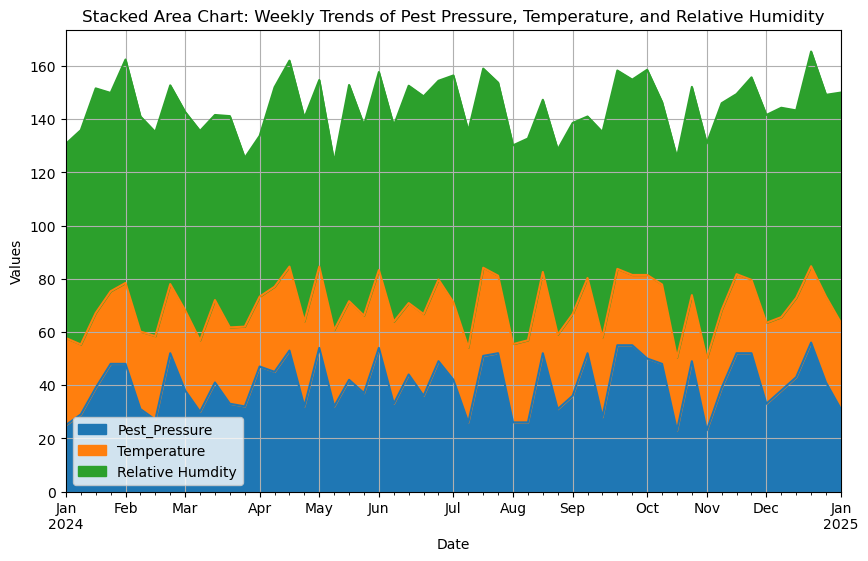

In [697]:
df.set_index('Date')[['Pest_Pressure', 'Temperature', 'Relative Humdity']].plot(kind='area', figsize=(10, 6))

plt.title('Stacked Area Chart: Weekly Trends of Pest Pressure, Temperature, and Relative Humidity')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [273]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'Pest_Pressure_category' column to encode it
encoded_labels = encoder.fit_transform(df['Pest_Pressure_category'])

# Shift the encoded labels to start from 1
df['Pest_Press_encoded'] = encoded_labels + 1

category_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Apply the mapping to the 'Pest_Pressure_category' column
df['Pest_Press_encoded'] = df['Pest_Pressure_category'].map(category_mapping)
# Rearrange columns in the specified sequence
df = df[['Date', 'Pest_Pressure', 'Temperature', 'Relative Humdity', 'Rainfall', 'Pest_Press_encoded', 'Pest_Pressure_category']]

# Display the first few rows of the updated DataFrame
df.head()

,Date,Pest_Pressure,Temperature,Relative Humdity,Rainfall,Pest_Press_encoded,Pest_Pressure_category
0,2024-01-07,25,32.714286,73.000000,115,1,Low
1,2024-01-14,29,26.285714,80.571429,168,1,Low
2,2024-01-21,39,28.142857,84.428571,186,2,Medium
3,2024-01-28,48,27.285714,74.571429,268,3,High
4,2024-02-04,48,30.428571,84.000000,184,3,High


In [275]:
data = df[['Pest_Pressure', 'Temperature', 'Relative Humdity', 'Rainfall', 'Pest_Press_encoded']]
data.head()

,Pest_Pressure,Temperature,Relative Humdity,Rainfall,Pest_Press_encoded
0,25,32.714286,73.000000,115,1
1,29,26.285714,80.571429,168,1
2,39,28.142857,84.428571,186,2
3,48,27.285714,74.571429,268,3
4,48,30.428571,84.000000,184,3


## I/P vs O/P corr plot

In [288]:
continuous_vars= ['Temperature', 'Relative Humdity', 'Rainfall']
continuous_vars

['Temperature', 'Relative Humdity', 'Rainfall']

### I/Ps vs Pest_Press_category

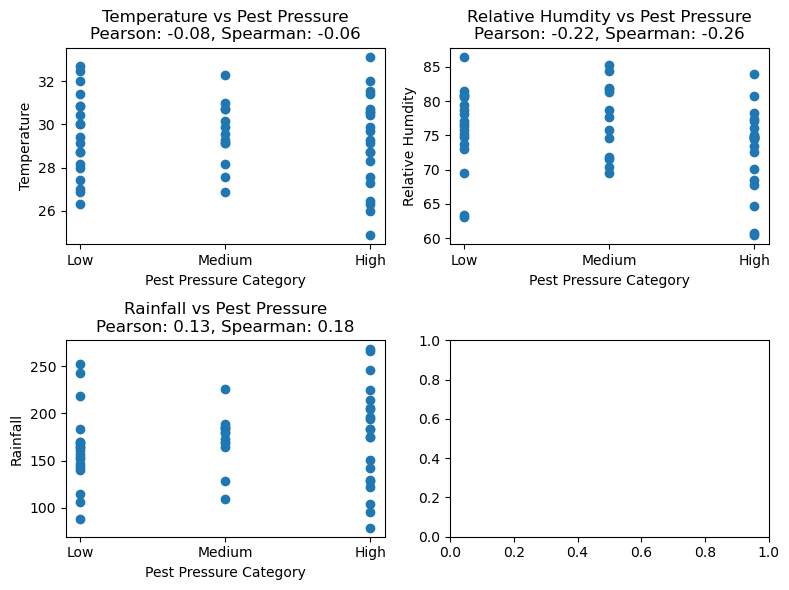

In [328]:
# Set up a grid for 2 plots per row
fig, axs = plt.subplots(2, 2, figsize=(8, 6))  # 2 rows, 2 columns

# Flatten the axes array to loop over it
axs = axs.ravel()

# Loop to create scatter plots and check for linearity
for i, var in enumerate(continuous_vars):
    # Plotting the scatter plot
    axs[i].scatter(df['Pest_Pressure_category'], df[var])
    axs[i].set_xlabel('Pest Pressure Category')
    axs[i].set_ylabel(var)
    axs[i].set_title(f'{var} vs Pest Pressure Category')
    pearson_corr = df['Pest_Press_encoded'].corr(df[var], method='pearson')
    spearman_corr = df['Pest_Press_encoded'].corr(df[var], method='spearman')
    axs[i].set_title(f'{var} vs Pest Pressure\nPearson: {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the plots
plt.show()

### I/Ps vs Pest_Pressure

In [627]:
## look for a linear trend in the plot

pearson corr Temperature = -0.07334420566686362
pearson corr Relative Humdity = -0.22259636179204922
pearson corr Rainfall = 0.08974187559455274


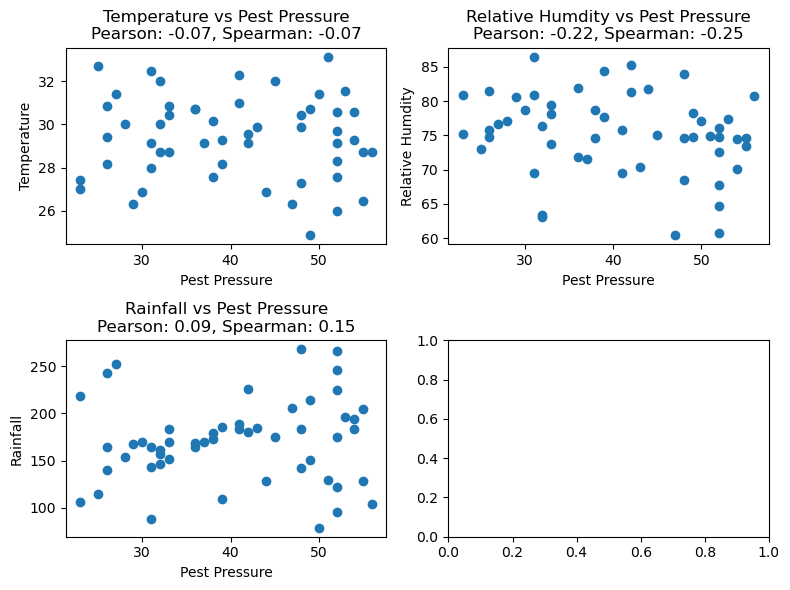

In [322]:
# Set up a grid for 2 plots per row
fig, axs = plt.subplots(2, 2, figsize=(8, 6))  # 2 rows, 2 columns

# Flatten the axes array to loop over it
axs = axs.ravel()

# Loop to create scatter plots and check for linearity
for i, var in enumerate(continuous_vars):
    # Plotting the scatter plot
    axs[i].scatter(df['Pest_Pressure'], df[var])
    axs[i].set_xlabel('Pest Pressure')
    axs[i].set_ylabel(var)
    axs[i].set_title(f'{var} vs Pest Pressure')
    pearson_corr = df['Pest_Pressure'].corr(df[var], method='pearson')
    spearman_corr = df['Pest_Pressure'].corr(df[var], method='spearman')
    axs[i].set_title(f'{var} vs Pest Pressure\nPearson: {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}')
    correlation = df['Pest_Pressure'].corr(df[var])
    print('pearson corr',var,'=', correlation)
# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the plots
plt.show()

In [282]:
correlation_matrix = data.corr(method='spearman')

# Display the Spearman correlation matrix
correlation_matrix

,Pest_Pressure,Temperature,Relative Humdity,Rainfall,Pest_Press_encoded
Pest_Pressure,1.000000,-0.065404,-0.250470,0.148413,0.937842
Temperature,-0.065404,1.000000,-0.077483,-0.143687,-0.059788
Relative Humdity,-0.250470,-0.077483,1.000000,-0.077559,-0.257770
Rainfall,0.148413,-0.143687,-0.077559,1.000000,0.180469
Pest_Press_encoded,0.937842,-0.059788,-0.257770,0.180469,1.000000


In [340]:
data.head()

,Pest_Pressure,Temperature,Relative Humdity,Rainfall,Pest_Press_encoded
0,25,32.714286,73.000000,115,1
1,29,26.285714,80.571429,168,1
2,39,28.142857,84.428571,186,2
3,48,27.285714,74.571429,268,3
4,48,30.428571,84.000000,184,3


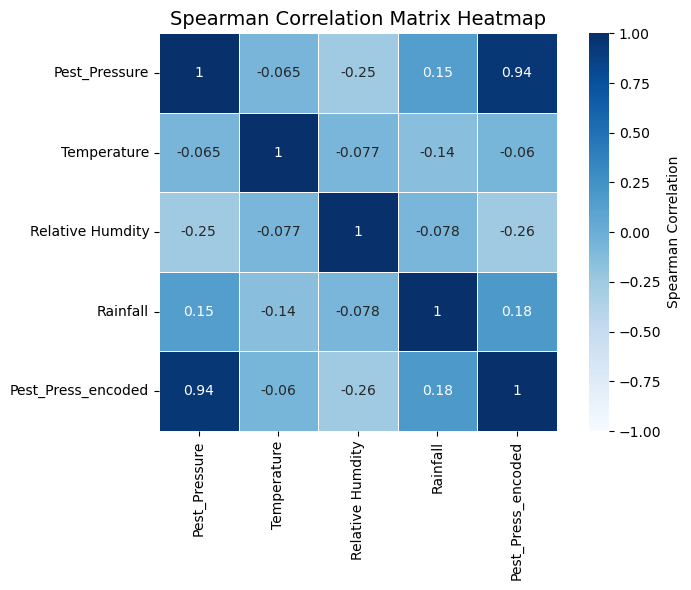

In [338]:
correlation_matrix = data.corr(method='spearman')
plt.figure(figsize=(8, 6))

# Create a heatmap with the specified color palette (reverse the palette for black at 1)
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0, 
            cbar_kws={'label': 'Spearman Correlation'}, square=True, 
            linewidths=0.5, annot_kws={'size': 10}, vmin=-1, vmax=1)

# Show the plot
plt.title("Spearman Correlation Matrix Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

## checking linearity of I/P vs Pest_Press_encoded

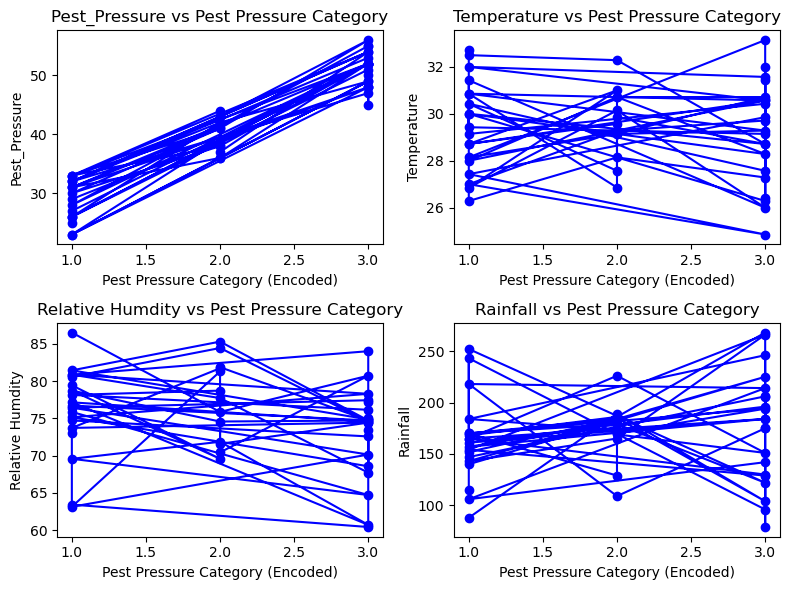

In [77]:
# Flatten the axes array to loop over it
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.ravel()

# Loop to create linear plots
for i, var in enumerate(continuous_vars):
    # Plotting the line plot
    axs[i].plot(df['Pest_Press_encoded'], df[var], marker='o', linestyle='-', color='b')
    axs[i].set_xlabel('Pest Pressure Category (Encoded)')
    axs[i].set_ylabel(var)
    axs[i].set_title(f'{var} vs Pest Pressure Category')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the plots
plt.show()

## checking distribution of I/P & O/P

In [263]:
# fig, axs = plt.subplots(2, 2, figsize=(8,6))  # 2 rows, 2 columns

# # Flatten the axes array to loop over it
# axs = axs.ravel()

# # Loop to create histograms for each continuous variable
# for i, var in enumerate(continuous_vars):
#     axs[i].hist(df[var], bins=5, edgecolor='black', alpha=0.7)  # You can adjust bins as needed
#     axs[i].set_xlabel(var)
#     axs[i].set_ylabel('Frequency')
#     axs[i].set_title(f'Histogram of {var}')

# # Adjust layout to prevent overlapping of titles and labels
# plt.tight_layout()

# # Show the plots
# plt.show()

C:\Users\shruti shreya\AppData\Local\Temp\ipykernel_16000\1619706901.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Pest_Press_encoded'], shade=True, color='skyblue', edgecolor='black')


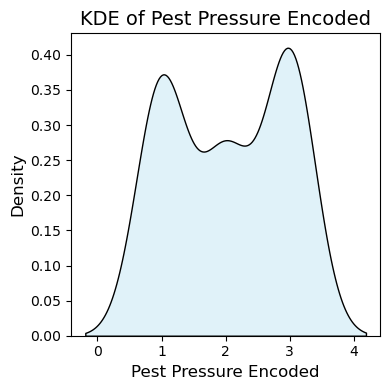

In [259]:
plt.figure(figsize=(4, 4))

# Using seaborn to plot the KDE
sns.kdeplot(df['Pest_Press_encoded'], shade=True, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('KDE of Pest Pressure Encoded', fontsize=14)
plt.xlabel('Pest Pressure Encoded', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\shruti shreya\AppData\Local\Temp\ipykernel_16000\2961336562.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='skyblue', edgecolor='black')
C:\Users\shruti shreya\AppData\Local\Temp\ipykernel_16000\2961336562.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='skyblue', edgecolor='black')
C:\Users\shruti shreya\AppData\Local\Temp\ipykernel_16000\2961336562.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='skyblue', edgecolor='black')
C:\Users\shruti shreya\AppData\Local\Temp\ipykernel_16000\2961336562.py:9: FutureWarn

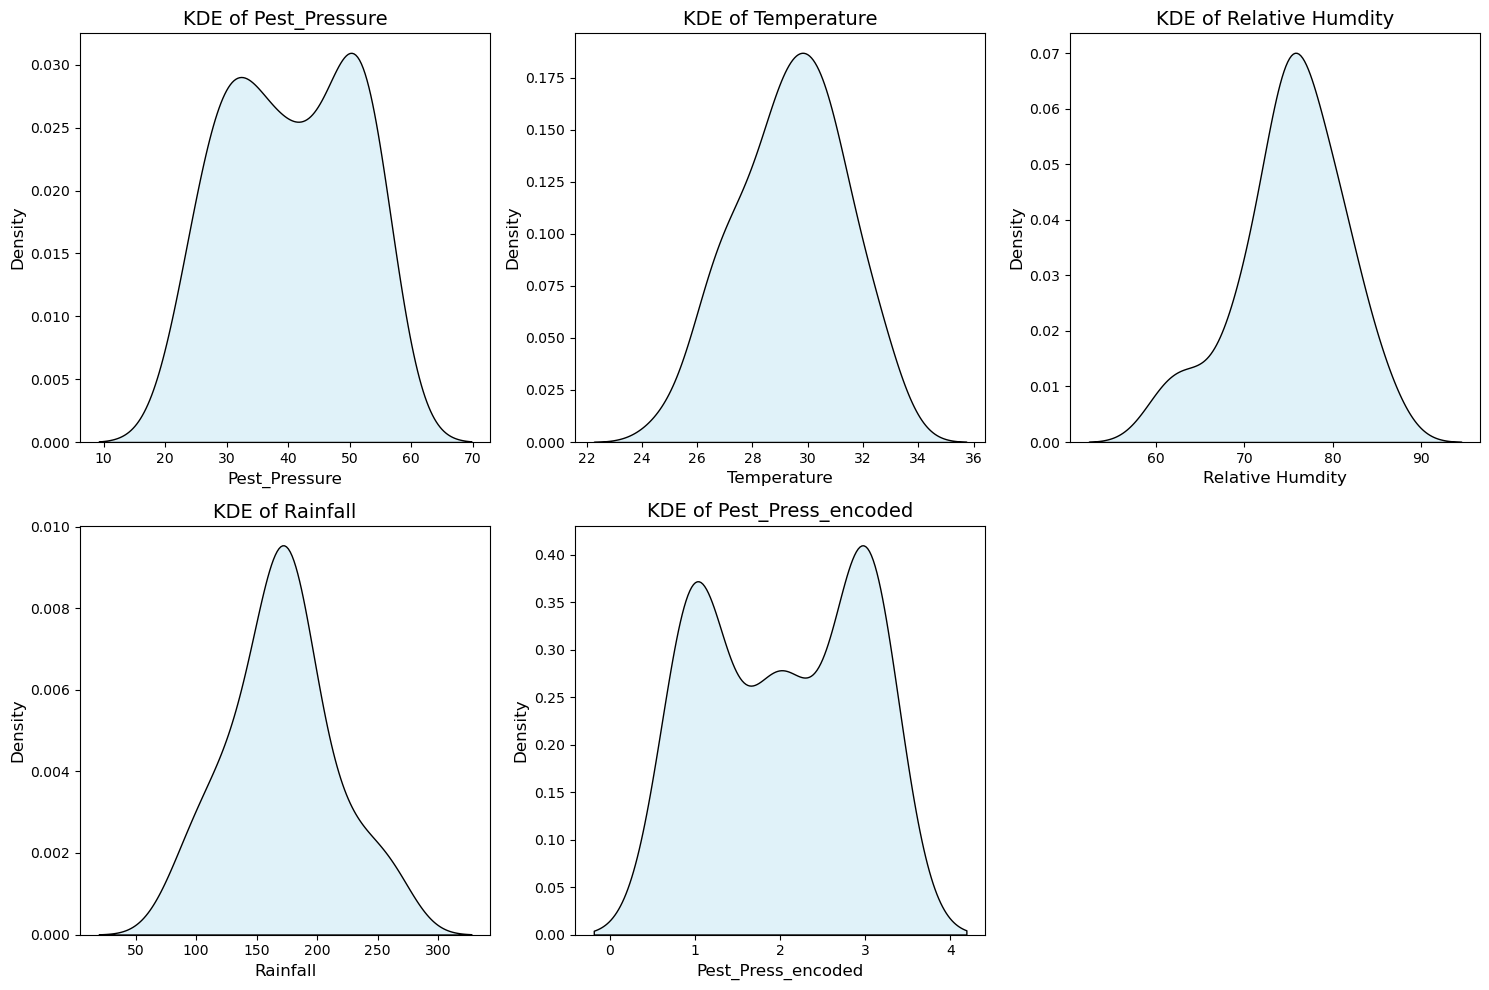

In [261]:
columns_to_plot = ['Pest_Pressure', 'Temperature', 'Relative Humdity', 'Rainfall', 'Pest_Press_encoded']

# Set up the plot
plt.figure(figsize=(15, 10))

# Loop to plot KDE for each column
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 3, i)  # Create subplots (2 rows, 3 columns)
    sns.kdeplot(df[column], shade=True, color='skyblue', edgecolor='black')
    
    # Customize each plot
    plt.title(f'KDE of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

# weekly trend of I/Ps

In [231]:
df = df[['Date', 'Pest_Pressure', 'Temperature', 'Relative Humdity', 'Rainfall', 'Pest_Press_encoded']]

# Display the first few rows of the updated DataFrame
df.head()

,Date,Pest_Pressure,Temperature,Relative Humdity,Rainfall,Pest_Press_encoded
0,2024-01-07,25,32.714286,73.000000,115,1
1,2024-01-14,29,26.285714,80.571429,168,1
2,2024-01-21,39,28.142857,84.428571,186,2
3,2024-01-28,48,27.285714,74.571429,268,3
4,2024-02-04,48,30.428571,84.000000,184,3


### pest pressure weekly trend

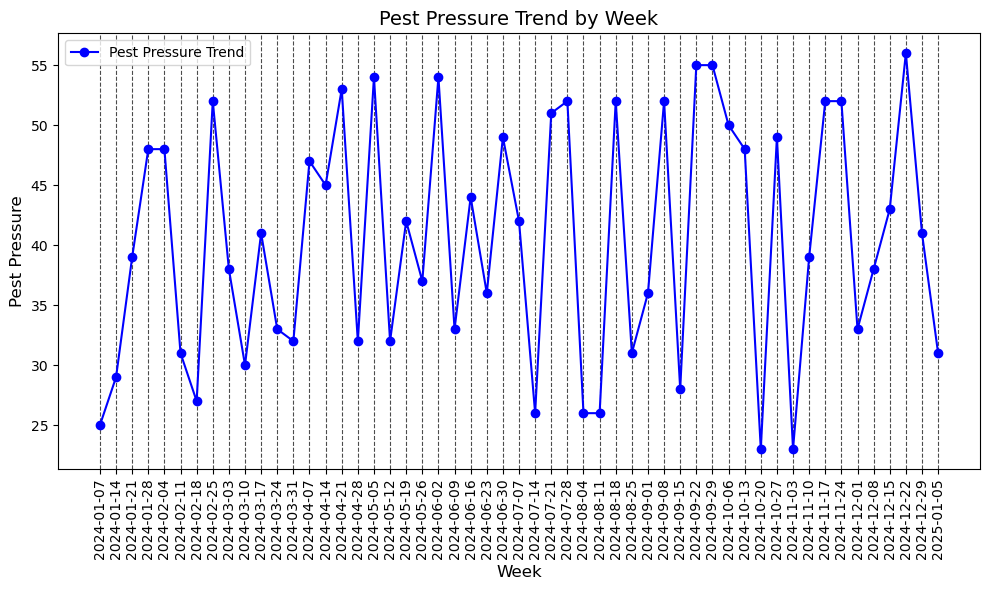

In [370]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # `errors='coerce'` ensures invalid parsing results in NaT

df['Week'] = df['Date'].dt.isocalendar().week

# Plotting the values of Rainfall against the Week number as a line chart
plt.figure(figsize=(10, 6))

# Plotting the line chart with 'Week' on the x-axis and 'Rainfall' on the y-axis
plt.plot(df['Date'], df['Pest_Pressure'], marker='o', color='blue', label='Pest Pressure Trend')

# Customize the plot
plt.title('Pest Pressure Trend by Week', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Pest Pressure', fontsize=12)
plt.xticks(df['Date'], rotation=90)  # Rotate dates to improve readability
plt.grid(axis='x', linestyle='--', alpha=0.7,color='black')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### temp weekly trend

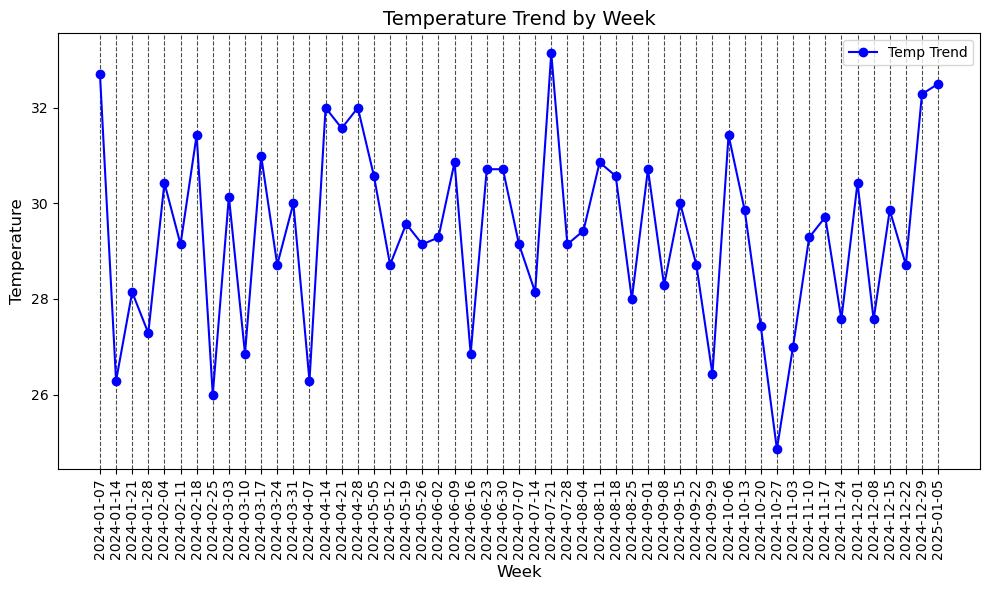

In [364]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # `errors='coerce'` ensures invalid parsing results in NaT

df['Week'] = df['Date'].dt.isocalendar().week

# Plotting the values of Rainfall against the Week number as a line chart
plt.figure(figsize=(10, 6))

# Plotting the line chart with 'Week' on the x-axis and 'Rainfall' on the y-axis
plt.plot(df['Date'], df['Temperature'], marker='o', color='blue', label='Temp Trend')

# Customize the plot
plt.title('Temperature Trend by Week', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.xticks(df['Date'], rotation=90)  # Rotate dates to improve readability
plt.grid(axis='x', linestyle='--', alpha=0.7, color= 'black')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### relative humidity weekly trend

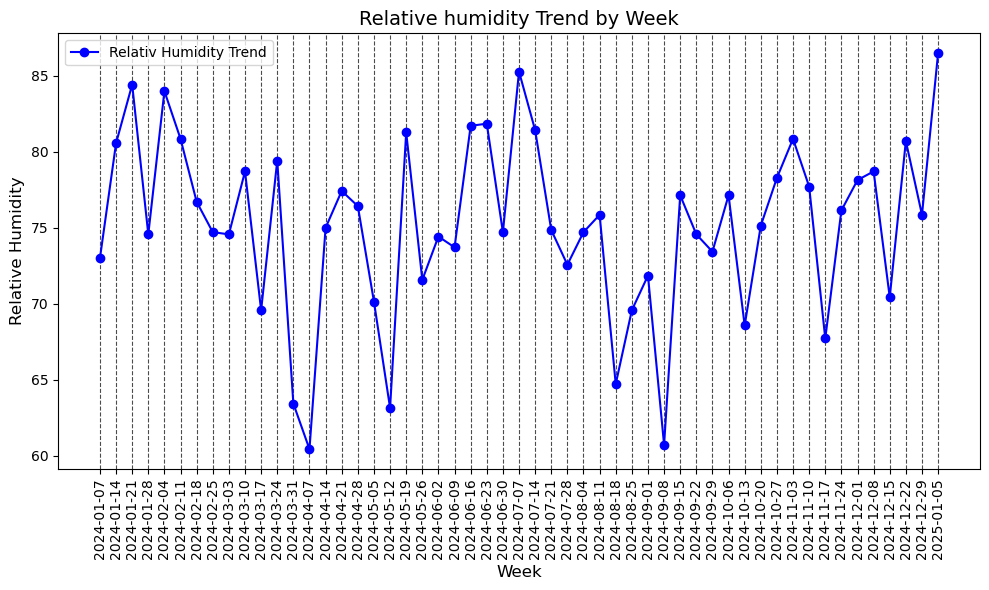

In [354]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # `errors='coerce'` ensures invalid parsing results in NaT

df['Week'] = df['Date'].dt.isocalendar().week

# Plotting the values of Rainfall against the Week number as a line chart
plt.figure(figsize=(10, 6))

# Plotting the line chart with 'Week' on the x-axis and 'Rainfall' on the y-axis
plt.plot(df['Date'], df['Relative Humdity'], marker='o', color='blue', label='Relativ Humidity Trend')

# Customize the plot
plt.title('Relative humidity Trend by Week', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Relative Humidity', fontsize=12)
plt.xticks(df['Date'], rotation=90)  # Rotate dates to improve readability
plt.grid(axis='x', linestyle='--', alpha=0.7, color='black')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### rainfall weekly trend

In [350]:
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # `errors='coerce'` ensures invalid parsing results in NaT

# # Check if the 'Date' column exists and is in datetime format


# # Extract the week number for each date
# df['Week'] = df['Date'].dt.isocalendar().week

# # Plotting the values of Pest_Pressure against the Week number
# plt.figure(figsize=(10, 6))

# # Plotting the bar chart with 'Week' on the x-axis and 'Pest_Pressure' on the y-axis
# plt.bar(df['Date'], df['Rainfall'], color='skyblue', edgecolor='black')

# # Customize the plot
# plt.title('Rainfall Trend by Week', fontsize=14)
# plt.xlabel('Week Number', fontsize=12)
# plt.ylabel('Rainfall', fontsize=12)
# plt.xticks(df['Date'], rotation=90)  # Ensure the week numbers are visible and not overlapping

# # Show the plot
# plt.tight_layout()
# plt.show()

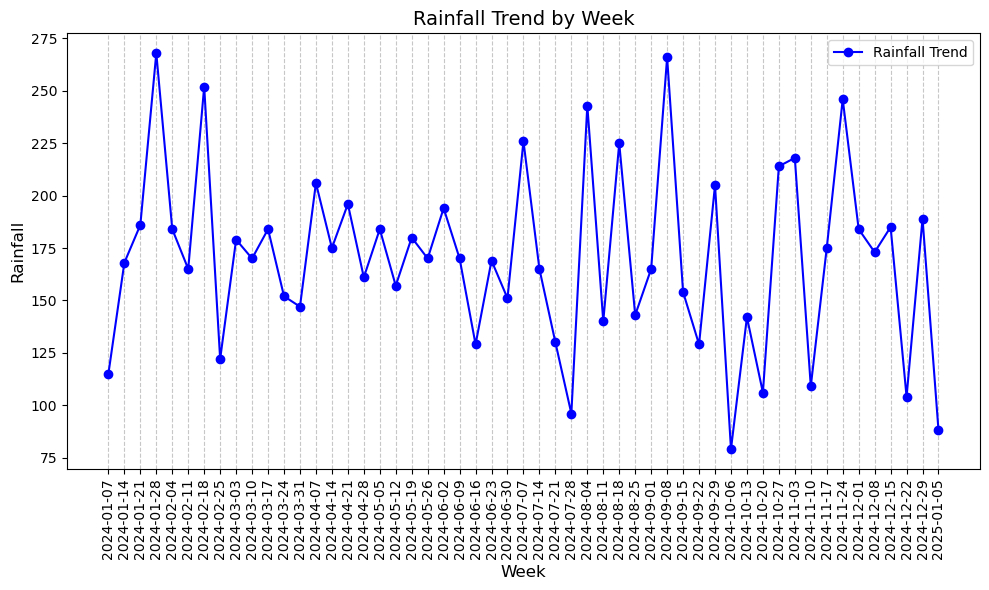

In [348]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # `errors='coerce'` ensures invalid parsing results in NaT

df['Week'] = df['Date'].dt.isocalendar().week

# Plotting the values of Rainfall against the Week number as a line chart
plt.figure(figsize=(10, 6))

# Plotting the line chart with 'Week' on the x-axis and 'Rainfall' on the y-axis
plt.plot(df['Date'], df['Rainfall'], marker='o', color='blue', label='Rainfall Trend')

# Customize the plot
plt.title('Rainfall Trend by Week', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Rainfall', fontsize=12)
plt.xticks(df['Date'], rotation=90)  # Rotate dates to improve readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Feature Selection

### Correlation based

In [374]:
correlation_matrix = data.corr(method='spearman')
correlation_matrix

,Pest_Pressure,Temperature,Relative Humdity,Rainfall,Pest_Press_encoded
Pest_Pressure,1.000000,-0.065404,-0.250470,0.148413,0.937842
Temperature,-0.065404,1.000000,-0.077483,-0.143687,-0.059788
Relative Humdity,-0.250470,-0.077483,1.000000,-0.077559,-0.257770
Rainfall,0.148413,-0.143687,-0.077559,1.000000,0.180469
Pest_Press_encoded,0.937842,-0.059788,-0.257770,0.180469,1.000000


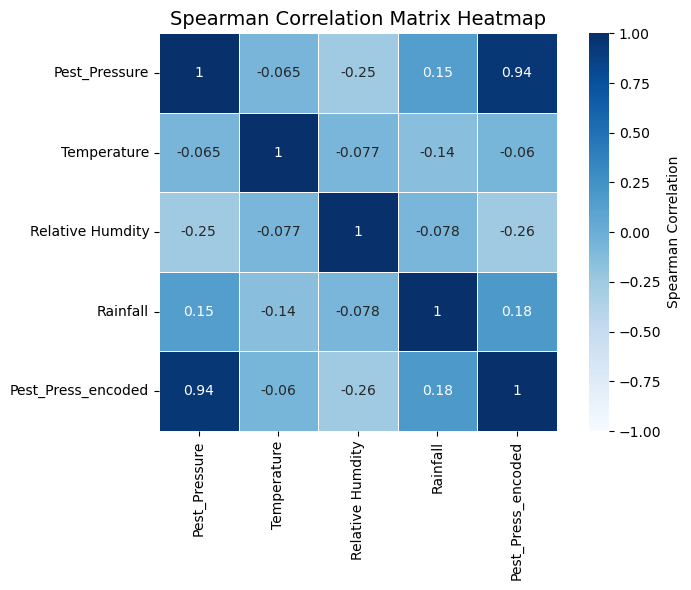

In [376]:
plt.figure(figsize=(8, 6))

# Create a heatmap with the specified color palette (reverse the palette for black at 1)
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0, 
            cbar_kws={'label': 'Spearman Correlation'}, square=True, 
            linewidths=0.5, annot_kws={'size': 10}, vmin=-1, vmax=1)

# Show the plot
plt.title("Spearman Correlation Matrix Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

In [380]:
df.head()

,Date,Pest_Pressure,Temperature,Relative Humdity,Rainfall,Pest_Press_encoded,Pest_Pressure_category,Week
0,2024-01-07,25,32.714286,73.000000,115,1,Low,1
1,2024-01-14,29,26.285714,80.571429,168,1,Low,2
2,2024-01-21,39,28.142857,84.428571,186,2,Medium,3
3,2024-01-28,48,27.285714,74.571429,268,3,High,4
4,2024-02-04,48,30.428571,84.000000,184,3,High,5


In [386]:
df_ip=df[['Temperature','Relative Humdity','Rainfall']]
df_ip.head()

,Temperature,Relative Humdity,Rainfall
0,32.714286,73.000000,115
1,26.285714,80.571429,168
2,28.142857,84.428571,186
3,27.285714,74.571429,268
4,30.428571,84.000000,184


In [390]:
df_op=df[['Pest_Pressure','Pest_Press_encoded']]
df_op.head()

,Pest_Pressure,Pest_Press_encoded
0,25,1
1,29,1
2,39,2
3,48,3
4,48,3


In [410]:
correlation_mat_ip = df_ip.corr(method='spearman')
correlation_mat_ip

,Temperature,Relative Humdity,Rainfall
Temperature,1.000000,-0.077483,-0.143687
Relative Humdity,-0.077483,1.000000,-0.077559
Rainfall,-0.143687,-0.077559,1.000000


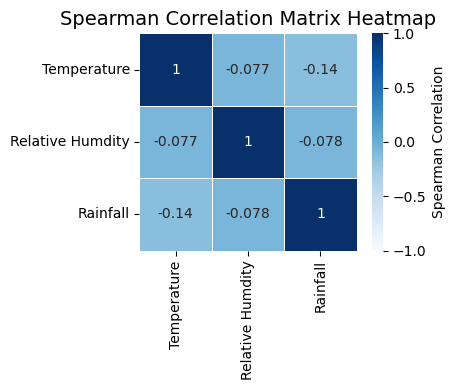

In [418]:
plt.figure(figsize=(5,4))

# Create a heatmap with the specified color palette (reverse the palette for black at 1)
sns.heatmap(correlation_mat_ip, annot=True, cmap='Blues', center=0, 
            cbar_kws={'label': 'Spearman Correlation'}, square=True, 
            linewidths=0.5, annot_kws={'size': 10}, vmin=-1, vmax=1)

# Show the plot
plt.title("Spearman Correlation Matrix Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

In [432]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_mx = correlation_matrix
    for i in range(len(corr_mx.columns)):
        for j in range(i):
            if abs(corr_mx.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_mx.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [434]:
corr_features = correlation(df_ip, 0.1)
len(set(corr_features))

1

In [426]:
corr_features

{'Rainfall'}

In [436]:
# we can drop rainfall based on the threshold corr

### Chi squared test based

In [455]:
y=df_op['Pest_Pressure']
y.head()

0    25
1    29
2    39
3    48
4    48
Name: Pest_Pressure, dtype: int64

In [457]:
from sklearn.feature_selection import chi2
f_p_vals=chi2(df_ip, y)
f_p_vals

(array([  4.20514954,  14.45312309, 252.33733717]),
 array([9.99999946e-01, 9.83649010e-01, 5.89557280e-38]))

In [467]:
import pandas as pd
p_vals=pd.Series(f_p_vals[1])
p_vals.index= df_ip.columns
p_vals

Temperature         9.999999e-01
Relative Humdity    9.836490e-01
Rainfall            5.895573e-38
dtype: float64

In [473]:
p_vals.min()

5.895572802817334e-38

In [475]:
## hence rainfall is the least imp feature

# model selection

In [631]:
df1= df.drop(['Week', 'Pest_Pressure_category', 'Rainfall','Date', 'Pest_Press_encoded'], axis=1)
df1.head()


,Pest_Pressure,Temperature,Relative Humdity,Residuals
0,25,32.714286,73.000000,-14.532216
1,29,26.285714,80.571429,-10.467873
2,39,28.142857,84.428571,1.436596
3,48,27.285714,74.571429,5.740558
4,48,30.428571,84.000000,11.093421


In [633]:
df_ip= df_ip[['Temperature', 'Relative Humdity']]
df_ip.head()

,Temperature,Relative Humdity
0,32.714286,73.000000
1,26.285714,80.571429
2,28.142857,84.428571
3,27.285714,74.571429
4,30.428571,84.000000


In [635]:
df_op= df_op[['Pest_Pressure']]
df_op.head()

,Pest_Pressure
0,25
1,29
2,39
3,48
4,48


In [637]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = df_ip[['Temperature','Relative Humdity']]
y = df_op['Pest_Pressure']

# Fit a Linear Regression model
model = LinearRegression()
model.fit(x, y)

# Calculate predictions
y_pred = model.predict(x)

# Calculate residuals
residuals = y - y_pred
df1['Residuals'] = residuals
df1.head()

,Pest_Pressure,Temperature,Relative Humdity,Residuals
0,25,32.714286,73.000000,-14.920018
1,29,26.285714,80.571429,-10.568999
2,39,28.142857,84.428571,1.629531
3,48,27.285714,74.571429,6.541523
4,48,30.428571,84.000000,11.365993


In [639]:
# residuals vs pred. look for a random scatter around 0. here it is almost.

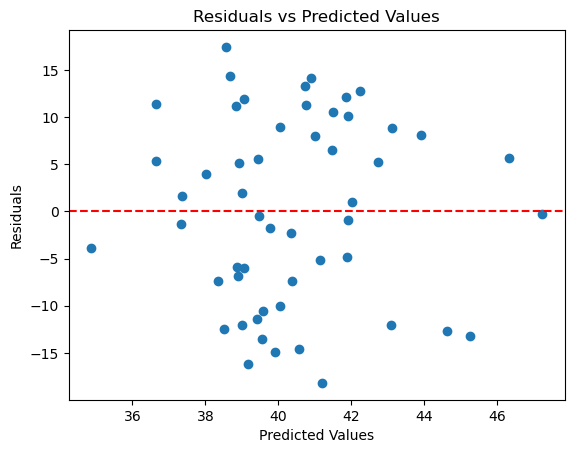

In [641]:
import matplotlib.pyplot as plt

# Residuals vs. Predicted Values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


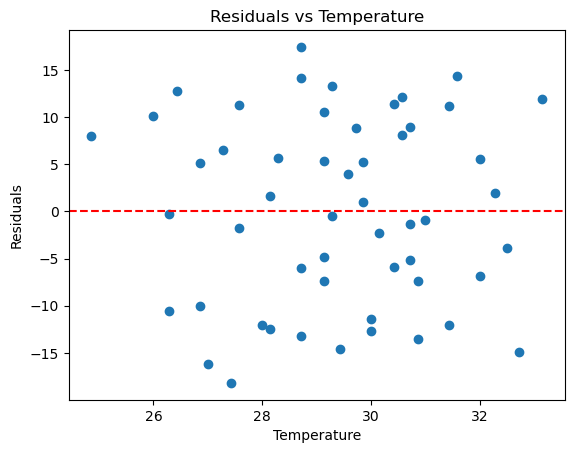

In [651]:
## residuals vs temp
import matplotlib.pyplot as plt

# Residuals vs. Predicted Values
plt.scatter(df1['Temperature'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Temperature')
plt.ylabel('Residuals')
plt.title('Residuals vs Temperature')
plt.show()


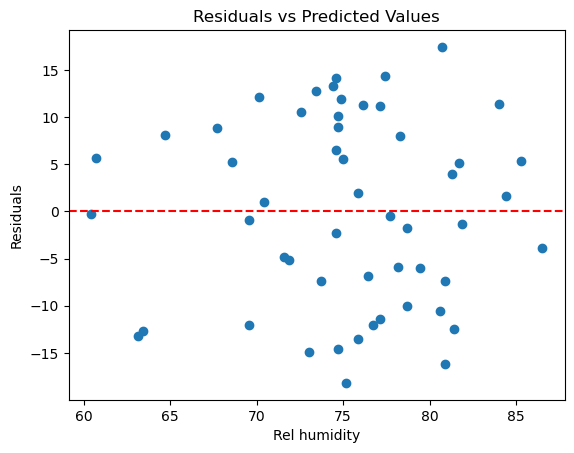

In [653]:
## residuals vs relative humidity
import matplotlib.pyplot as plt

# Residuals vs. Predicted Values
plt.scatter(df1['Relative Humdity'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Rel humidity')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


In [616]:
## residuals should follow normal distn

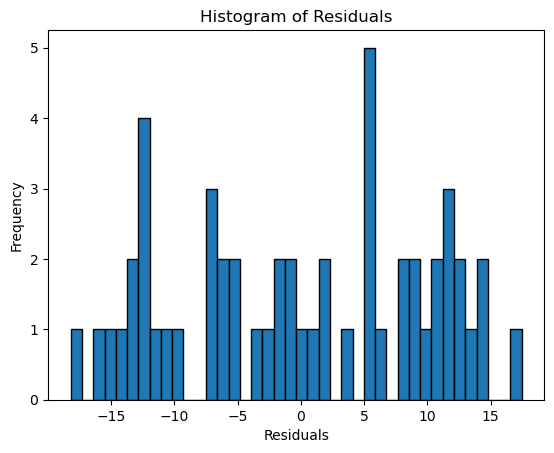

In [643]:
plt.hist(residuals, bins=40, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [645]:
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print('Shapiro-Wilk Test Statistic:', stat)
print('p-value:', p)
if p > 0.05:
    print("Residuals appear to follow a normal distribution.")
else:
    print("Residuals do not appear to follow a normal distribution.")


Shapiro-Wilk Test Statistic: 0.9496562570193666
p-value: 0.026016205118003944
Residuals do not appear to follow a normal distribution.


In [ ]:
## residuals vs actual o/p. if linear, then not apply MLR

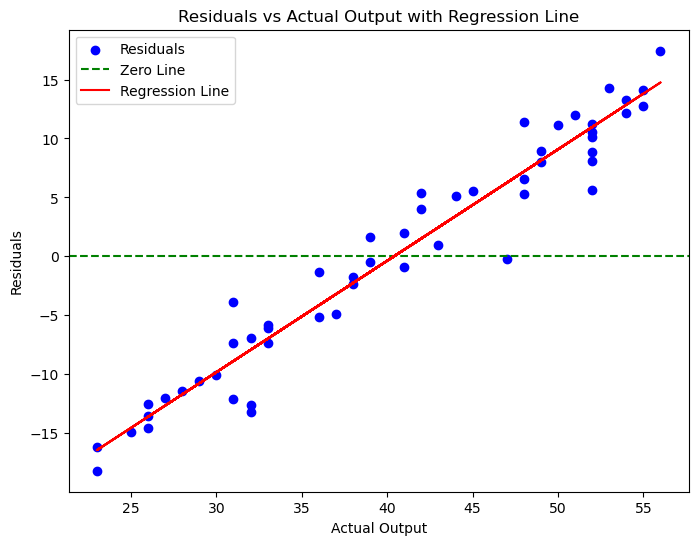

In [530]:
import numpy as np
plt.figure(figsize=(8, 6))
plt.scatter(y, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='green', linestyle='--', label='Zero Line')
z = np.polyfit(y, residuals, 1)  # Linear regression
p = np.poly1d(z)
plt.plot(y, p(y), color='red', label='Regression Line')
plt.xlabel('Actual Output')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Output with Regression Line')
plt.legend()
plt.show()

In [536]:
## indep vs dep col

Apply MLR if
1. residuals follow normal distn
2. plot of residuals vs pred vals should be randomly scattered around zero i.e. homoscedasticity
3. linear trend should be visible in the plot of i/p cols vs target col.
   
Here, only 2 is followed almost. So Linear regression is not a good fit for this data

# Model Evaluation

In [659]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [665]:
n= len(df_op['Pest_Pressure'])
n

53

In [669]:
p= len(df_ip.columns)
p

2

In [673]:
r2 = r2_score(df_op['Pest_Pressure'], y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# 2. MSE and RMSE
mse = mean_squared_error(df_op['Pest_Pressure'], y_pred)
rmse = np.sqrt(mse)

# 3. MAE
mae = mean_absolute_error(df_op['Pest_Pressure'], y_pred)

# 4. Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # Use 5-fold CV

# Print results
print(f"R2 Score: {r2}")
print(f"Adjusted R2 Score: {adj_r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R2: {np.mean(cv_scores)}")

R2 Score: 0.05505600623058249
Adjusted R2 Score: 0.017258246479805783
Mean Squared Error (MSE): 95.64757417603093
Root Mean Squared Error (RMSE): 9.77995777986955
Mean Absolute Error (MAE): 8.542248823085654
Cross-Validation R2 Scores: [-0.20358112 -0.09203737 -0.05329407 -0.04966823  0.00470426]
Mean Cross-Validation R2: -0.07877530441459686


## not going with MLR

<Axes: >

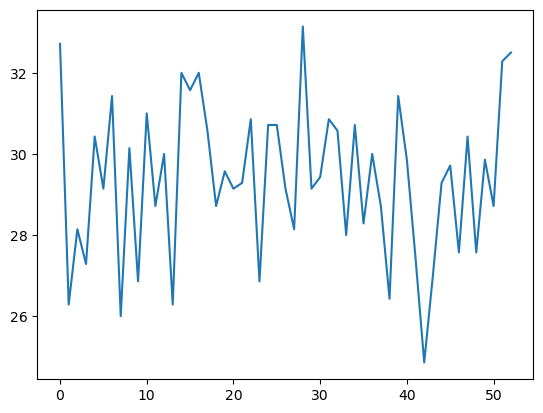

In [679]:
df['Temperature'].plot()

In [681]:
df.head()

,Date,Pest_Pressure,Temperature,Relative Humdity,Rainfall,Pest_Press_encoded,Pest_Pressure_category,Week,Residuals
0,2024-01-07,25,32.714286,73.000000,115,1,Low,1,-14.532216
1,2024-01-14,29,26.285714,80.571429,168,1,Low,2,-10.467873
2,2024-01-21,39,28.142857,84.428571,186,2,Medium,3,1.436596
3,2024-01-28,48,27.285714,74.571429,268,3,High,4,5.740558
4,2024-02-04,48,30.428571,84.000000,184,3,High,5,11.093421


In [683]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)
df.head()

,Pest_Pressure,Temperature,Relative Humdity,Rainfall,Pest_Press_encoded,Pest_Pressure_category,Week,Residuals
Date,,,,,,,,
2024-01-07,25,32.714286,73.000000,115,1,Low,1,-14.532216
2024-01-14,29,26.285714,80.571429,168,1,Low,2,-10.467873
2024-01-21,39,28.142857,84.428571,186,2,Medium,3,1.436596
2024-01-28,48,27.285714,74.571429,268,3,High,4,5.740558
2024-02-04,48,30.428571,84.000000,184,3,High,5,11.093421


<Axes: xlabel='Date'>

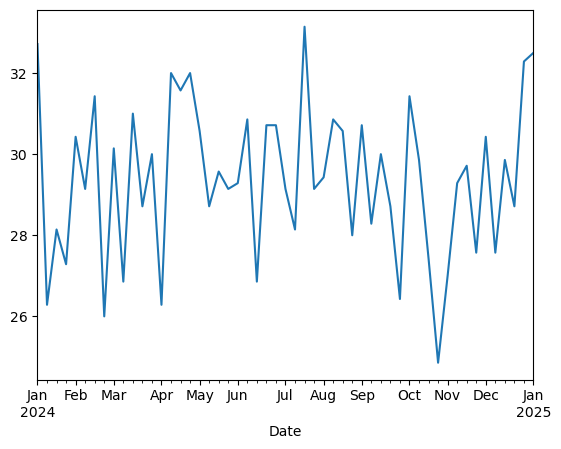

In [685]:
df['Temperature'].plot()

In [687]:
df.index

DatetimeIndex(['2024-01-07', '2024-01-14', '2024-01-21', '2024-01-28',
               '2024-02-04', '2024-02-11', '2024-02-18', '2024-02-25',
               '2024-03-03', '2024-03-10', '2024-03-17', '2024-03-24',
               '2024-03-31', '2024-04-07', '2024-04-14', '2024-04-21',
               '2024-04-28', '2024-05-05', '2024-05-12', '2024-05-19',
               '2024-05-26', '2024-06-02', '2024-06-09', '2024-06-16',
               '2024-06-23', '2024-06-30', '2024-07-07', '2024-07-14',
               '2024-07-21', '2024-07-28', '2024-08-04', '2024-08-11',
               '2024-08-18', '2024-08-25', '2024-09-01', '2024-09-08',
               '2024-09-15', '2024-09-22', '2024-09-29', '2024-10-06',
               '2024-10-13', '2024-10-20', '2024-10-27', '2024-11-03',
               '2024-11-10', '2024-11-17', '2024-11-24', '2024-12-01',
               '2024-12-08', '2024-12-15', '2024-12-22', '2024-12-29',
               '2025-01-05'],
              dtype='datetime64[ns]', name='Dat